## Perceptron and Artificial Neural Network

---

## Introduction

Artificial neural network is a machine learning algorithm that was developed earlier and is very commonly used. Because of its ability to mimic the work of human neurons, neural networks have demonstrated excellent capabilities in both supervised and unsupervised learning. At present, convolutional neural networks and recurrent neural networks, developed from traditional artificial neural networks, have become the cornerstone of deep learning. In this chapter, we will introduce the characteristics and applications of artificial neural networks in machine learning from a prototype perceptron.

### Key Points

- Perceptron concept
- Perceptron principle
- Perceptron implementation
- Multilayer perceptron
- Artificial neural network concept
- Artificial neural network principle
- Principle and derivation of backpropagation algorithm
- Multi-layer artificial neural network implementation

## Perceptron

The focus of this chapter is on artificial neural networks. However, before introducing the artificial neural network, let us introduce its prototype: perceptron. Regarding the perceptron, we first quote a background from Wikipedia:

> The perceptron algorithm was invented in 1957 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. It is a type of linear classifier, i.e., a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

If you have never been exposed to artificial neural networks before, then you may have to wait until the end of this experiment to fully understand the above sentence. However, we will soon discover that the perceptron is actually an artificial neural network, but it is just its primary form.

### Perceptron Derivation Process

So, **what is perceptron? How was it invented?**

To figure it out, we need to mention a very familiar knowledge point learned in the previous chapters: linear regression. Recalling the content of the logistic regression in the first quarter of this week, you should still remember that we have said that logistic regression originated from linear regression. Perceptron is the simplest binary classification model. In fact, it uses linear regression to perform the classification of data points. The method introduced by logistic regression using the logistic estimate to calculate the classification probability can even be regarded as the start of the perceptron.

In the learning process of the perceptron, we usually use the distance from the misclassification point to the dividing line (face) to define the loss function.

#### Point-to-Line Distance

In the middle school stage, we learned the distance formula from a point to a straight line. For any point $x_0$ in an $n$-dimensional real vector space, its distance to the line $W*x+b=0$ can be expressed as:

$$
d= \dfrac{1}{\parallel W\parallel}|W*x_{0}+b| \tag{4}
$$

Where $||W||$ represents the $L_2$ norm, which is the square root of the sum of the squares of the elements of the vector.

Then, for the misclassification point $(x_i, y_i)$, the formula $(5)$ holds good:

$$
- y_i(W * x_{i}+b)>0 \tag{5}
$$

Thus the distance from the misclassification point $(x_i,y_i)$ to the dividing line (face) is:

$$
d=-\dfrac{1}{\parallel W\parallel}y_i(W*x_{i}+b) \tag{6}
$$

So, assuming that the set of all misclassification points is $M$, the distance from all misclassification points to the dividing line (face) is:

$$
-\dfrac{1}{\parallel W\parallel}\sum_{x_i\epsilon M} y_i(W*x_{i}+b) \tag{7}
$$

**Finally, the loss function of the perceptron is**:

$$
J(W,b) = - \sum_{x_i\epsilon M} y_i(W*x_{i}+b) \tag{8}
$$

As can be seen from equation $(8)$, the loss function $J(W,b)$ is non-negative. When there is no misclassification point, the value of the loss function is $0$. At the same time, fewer the misclassification points, the closer the misclassification points are to the dividing line (face), and the smaller the loss function value. The loss function $J(W,b)$ is a continuous derivable function as well.

### Stochastic Gradient Descent

When we are classifying, the perfect result is definitely that there is no misclassification, that is, the result when the loss function takes a minimum value. In the logistic regression experiment, in order to find the minimum value of the loss function, we used a method called _Gradient Descent_. In today's experiment, we will try an improved method of gradient descent, also known as _Stochastic Gradient Descent (SGD)_.

When using SGD to calculate the minimum value of the loss function (see equation $(8)$), first select a split face $W_0$ and $b_0$, and then use the gradient descent method to continually minimize the loss function:

$$
min_{W,b} J(W,b) = - \sum_{x_i\epsilon M} y_i(W*x_{i}+b) \tag{9}
$$

The characteristic feature of random gradient descent is that, during the minimization process, gradient descent is not performed for all misclassification points in $M$ at one time, but each time a misclassification point is selected randomly to perform the gradient descent. After updating $W$ and $b$, the next time you randomly select a misclassification point again to perform the gradient descent until convergence.

Calculate the partial derivative of the loss function:

$$
\frac{\partial J(W,b)}{\partial W} = - \sum_{x_i\epsilon M}y_ix_i \\
\frac{\partial J(W,b)}{\partial b} = - \sum_{x_i\epsilon M}y_i \tag{10}
$$

If $y_i(W * x_{i}+b)\leq0$, update $W$ and $b$:

$$
W \leftarrow   W + \lambda y_ix_i \\
b \leftarrow  b + \lambda y_i \tag{11}
$$

Consistent with the previous gradient descent, $\lambda$ is the learning rate, which is the step size for each gradient descent operation.

Next we use Python to implement the above SGD algorithm:

In [2]:
def perceptron_sgd(X, Y, alpha=0.05, epochs=1000):
    X = np.asarray(X, dtype=float)
    Y = np.asarray(Y).astype(float).reshape(-1)  # ensure shape (n,)
    assert set(np.unique(Y)).issubset({-1.0, 1.0}), "Y must be in {-1, +1}"

    n_features = X.shape[1]
    w = np.zeros(n_features, dtype=float)
    b = 0.0

    loss_history = []  # misclassification count per epoch

    for t in range(epochs):
        errors = 0
        for i, x in enumerate(X):
            margin = (np.dot(x, w) + b) * Y[i]
            if margin <= 0:
                w = w + alpha * x * Y[i]
                b = b + alpha * Y[i]
                errors += 1
        loss_history.append(errors)  # “loss” = # of mistakes this epoch
        # (optional) early stop:
        # if errors == 0: break

    return w, b, loss_history

### Implementation of Perceptron Classification

In the previous section, we discussed the calculation flow, the loss function, and how to use the stochastic gradient descent to determine the parameters. The theory says so much; now let's take a look at a practical example.

#### Dataset

In order to facilitate drawing in a two-dimensional plane, here we use data containing only two feature variables. The dataset name is `course-12-data.csv`. First download and load the sample data:

In [3]:
!curl -L -o course-12-data.csv http://labfile.oss.aliyuncs.com/courses/1081/course-12-data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1617  100  1617    0     0   2634      0 --:--:-- --:--:-- --:--:--  2637


In [4]:
"""Download dataset
"""
import pandas as pd

df = pd.read_csv("course-12-data.csv", header=0) # Load
df.head() # Preview

,X0,X1,Y
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


As you can see, the dataset has two feature variables `X0` and `X1`, and a target value `Y`. Among them, the target value `Y` contains only `-1` and `1`. We try to plot the dataset into a graph and take a look at the distribution:

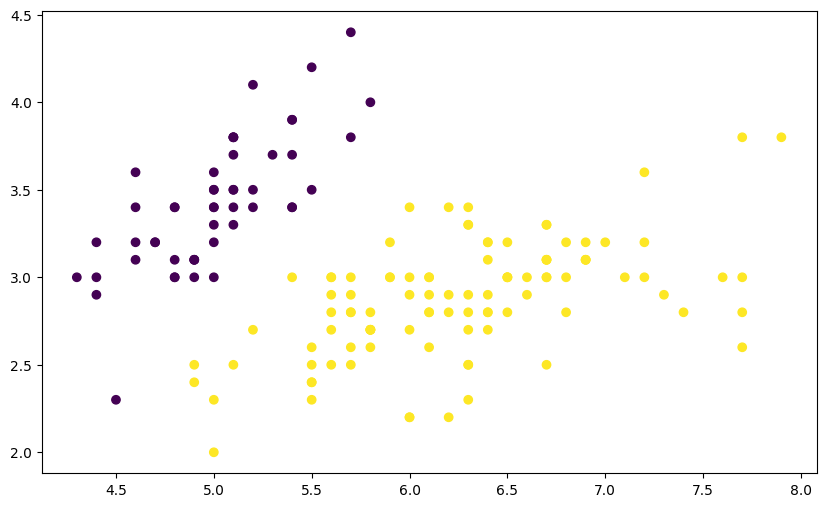

In [7]:
"""Draw
"""
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df['X0'],df['X1'], c=df['Y'])

#### Perceptron Training

Next we use the perceptron to solve the optimal split line:

In [8]:
import numpy as np

X = df[['X0','X1']].values
Y = df['Y'].values

alpha = 0.1
epochs = 150

perceptron_sgd(X, Y, alpha, epochs)

(array([ 4.93, -6.98]),
 -3.3000000000000016,
 [2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2])

Therefore, the best line equation we have obtained is:

$$
f(x) = 4.93*x_1-6.98*x_2 -3.3 \tag{12}
$$

At this point, you can check the correct rate of classification:

In [9]:
L = perceptron_sgd(X, Y, alpha, epochs)
w1 = L[0][0]
w2 = L[0][1]
b = L[1]

z = np.dot(X, np.array([w1, w2]).T) + b
np.sign(z)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

For convenience, we use the accuracy calculation method `accuracy_score()` provided by scikit-learn. I believe you are quite familiar with it:

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(Y, np.sign(z))

0.9866666666666667

The final classification accuracy is about `0.987`.

#### Draw Margins

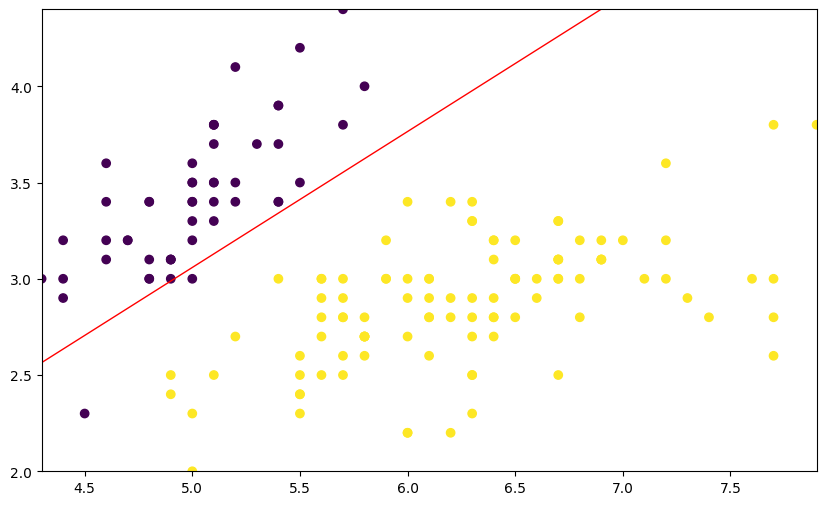

In [11]:
# Draw margins -elective-
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'],df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max(),
x2_min, x2_max = df['X1'].min(), df['X1'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[0][0], L[0][1]]).T) + L[1]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0], linewidths=1, colors='red');

The red line in the picture above is our final result. The effect of the classification seems good.

#### Draw Loss Function Changing Curve

In addition to drawing the margins, we can also draw the process of loss function changes to see the execution of the gradient descent:

In [16]:
def perceptron_loss(X, Y, alpha=0.05, epochs=1000):
    """
    X: (n_samples, n_features) numpy array
    Y: (n_samples,) labels in {-1, +1}
    """
    X = np.asarray(X)
    Y = np.asarray(Y).astype(float)

    w = np.zeros(X.shape[1], dtype=float)
    b = 0.0  # скаляр, не массив!
    loss_list = []

    for _ in range(epochs):
        loss_epoch = 0.0
        for x, y in zip(X, Y):
            margin = y * (np.dot(x, w) + b)
            if margin <= 0:
                # для «персептрон-лосса» добавим -margin (оно >= 0 на ошибках)
                loss_epoch += -float(margin)
                # апдейты
                w = w + alpha * y * x
                b = b + alpha * y
        loss_list.append(loss_epoch)

    return loss_list

Text(0, 0.5, 'Loss function')

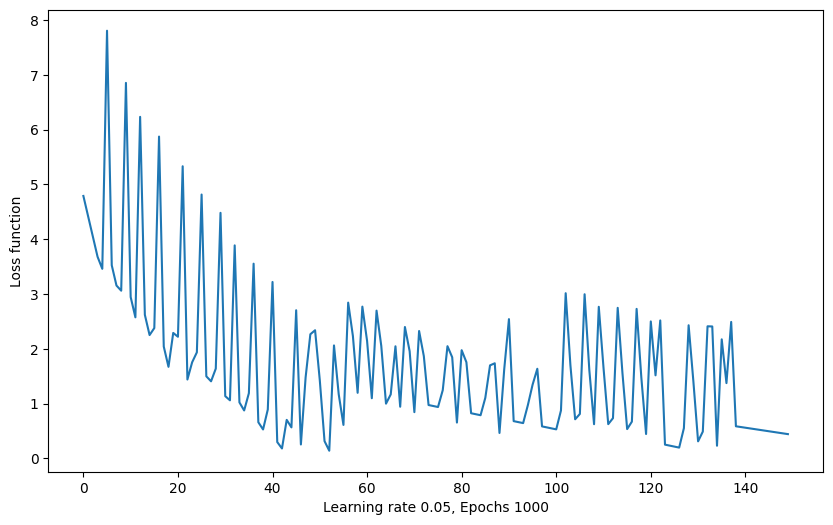

In [19]:
loss_list = perceptron_loss(X, Y, alpha=0.1, epochs=150)

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel("Learning rate {}, Epochs {}".format(alpha, epochs))
plt.ylabel("Loss function")

As shown above, you will find that when we iterate `150` times with learning rate `0.1`, the loss function still cannot reach `0`. In general, when our data is not linearly separable, the loss function will appear oscillating linearly.

However, if you look closely at the scatter plot of the above data, you will find that the dataset appears to be linearly separable. When the dataset is linearly separable, there is any of the two reasons to explain: **The learning rate is too large** or **the number of iterations is too small**.

It is well understood that the number of iterations is too small, that is, the number of iterations is not enough to find the minimum value. As for the learning rate being too large, you can see the schematic below.

As shown in the above figure, when our learning rate is too large, it tends to oscillate back and forth at the bottom of the loss function, so we cannot reach the minimum point.

In general, we can find the minimum value of the loss function by reducing the learning rate and increasing the number of iterations.

We try one more time:

Text(0, 0.5, 'Loss function')

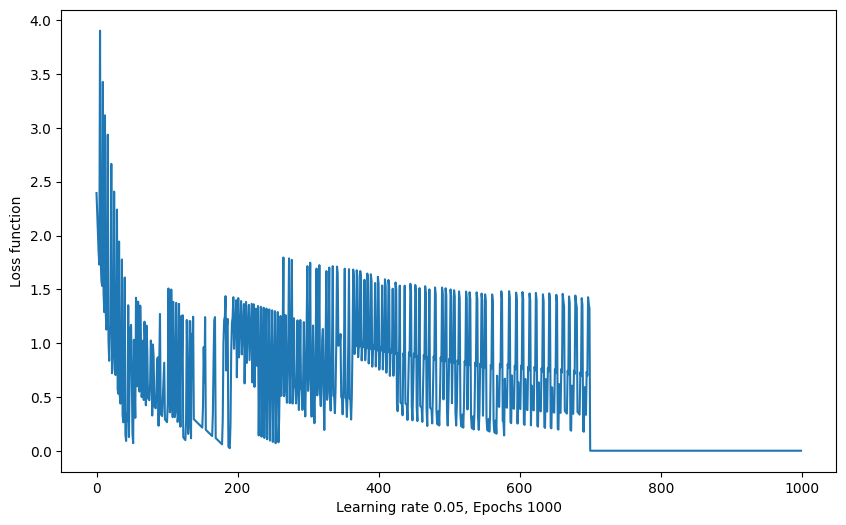

In [18]:
alpha = 0.05 # Reduce learning rate
epochs = 1000 # Increase the number of iterations

loss_list = perceptron_loss(X, Y, alpha, epochs)

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel("Learning rate {}, Epochs {}".format(alpha, epochs))
plt.ylabel("Loss function")

It can be seen that, when the number of iterations is about `700`, the value of the loss function is equal to `0`. According to what we have introduced before, when the loss function is `0`, it means there is no misclassification point.

At this point, we calculate the classification accuracy again:

In [20]:
L = perceptron_sgd(X, Y, alpha, epochs)
z = np.dot(X, L[0].T) + L[1]
accuracy_score(Y, np.sign(z))

1.0

Consistent with the conclusions obtained from the loss function curve, the classification accuracy rate has been $100\%$, indicating that all the data points have been classified correctly.

## Artificial Neural Networks

Above we have learned what a perceptron is and how to build a perceptron classification model. You will find that the perceptron can only deal with the binary classification problem and must be a linearly separable problem. If this is the case, the limitations of this method are relatively large. So, is there a better way to deal with linearly indivisible or multi-classification problems?

### Multilayer Perceptron and Artificial Neural Network

Here we must mention the protagonist of this article, that is, _artificial neural network_ (referred to as: _ANN_). If you are new to artificial neural networks, don't be afraid of it. In fact, the above perceptron model is an artificial neural network, but it is a simple single-layer neural network. When we have the problem of linear indivisibility or multi-classification to solve, we will try to combine multiple perceptrons into a more complex neural network structure.

<div style="color: #999;font-size: 12px;font-style: italic;">* Due to some historical problems, the classification of the three theories of perceptron, multilayer perceptron and artificial neural network is vague. The artificial neural network introduced in this experiment refers to the multi-layer perceptron in a certain sense.</div>

In the above section, we have shown the workflow of the perceptron through a picture. We will further simplify it as follows:

This picture shows the execution flow of a perceptron model. We can call the input _"input layer"_ and the output _"output layer"_. For a network structure that contains only one input layer like this, it can be called a _single-layer neural network_ structure.

The perceptron becomes a single-layer neural network. If we use the output of one perceptron as the input of another perceptron, it constitutes a multi-layer perceptron, which is called a _multi-layer neural network_. We will refer to the layer between the input layer and the output layer as "hidden layer". As shown in the figure below, this is the neural network structure containing one hidden layer.

When calculating the number of layers in a neural network structure, we generally calculate only the number of input and hidden layers, that is, the structure above is a 2-layer neural network structure.

### Activation Function

So far, we have been exposed to the concepts of logistic regression, perceptron, multilayer perceptron and artificial neural network. You may realize it seems that these four methods are all related to linear functions and the difference lies only in the treatment of the dependent variable:

$$
f(x) = w_1x_1+w_2x_2+ \cdots +w_nx_n + b = WX+b \tag{13}
$$

- For logistic regression, we use the $sigmoid$ function to convert $f(x)$ to probability and finally to achieve the binary classification.
- For perceptrons, we use the $sign$ function to convert $f(x)$ to $-1$ and $+1$ to achieve the binary classification.
- For multi-layer perceptrons with a multi-layer neural network structure, there are generally more operations on the $f(x)$ processing.

The $sigmoid$ function and the $sign$ function have another title called **"activation function"**. The reason why there is such a title is because the function itself has some characteristics; still it is a mathematical function. Below we will list some common activation functions and their images:

#### $Sigmoid$

The $sigmoid$ function should already be very familiar to you. Its formula is as follows:

$$
sigmoid(x)=\frac{1}{1+e^{-x}} \tag{14}
$$

The graph of the $sigmoid$ function is S-type with a function value between $(0, 1)$:

#### $Tanh$

The graph of the $Tanh$ function is similar to that of the $sigmoid$ function in that it is S-type, but the $Tanh$ function value is between $(-1, 1)$. The formula is as follows:

$$
tanh(x)=\frac{1-e^{-2x}}{1+e^{-2x}}\tag{15}
$$

$ReLU$ has many advantages, such as faster convergence and being less prone to gradient disappearance. Since this experiment is not going to use it, we will talk about it later. The image of $ReLU$ is as follows:

#### Use of Activation Function

In a neural network structure, we continuously connect an input and an output using a linear function. You can imagine that in this structure each layer of an output is a linear transformation of the upper input. Thus, regardless of the number of layers in the neural network, the final output is a linear combination of inputs. In this case, what is the difference between a single-layer neural network and a multi-layer neural network? (No difference!)

As shown in the figure above, the multiple combinations of linear transformations are still linear transformations. If we add an activation function to the network structure, it is equivalent to introducing non-linear factors, so that we can solve the classification task that the linear model can't.

### Intuitive Recognition of Backpropagation

In the section of perceptron, we define a loss function and solve the optimal parameters by a method called stochastic gradient descent. If you look closely at the process, you are actually solving for the weights $W$ and $b$ by solving partial derivatives and combining them into gradients. The perceptron has only one layer of network structure and the process of solving the gradient is relatively simple. However, when we are into a multi-layer neural network, the process of updating the weights becomes complicated, and the backpropagation algorithm is born to solve the gradient quickly.

The algorithm for backpropagation is simple to say, but it is more complicated to understand. Here we quote a picture from a paper from the AGH University of Science and Technology in Poland to help understand the process of backpropagation.([Reference](http://galaxy.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html))

The following figure presents a classic 3-layer neural network structure with two inputs $x_{1}$ and $x_{2}$, and one output $y$:

Each purple unit in the network represents an independent neuron, which consists of two units. One unit is the weight and the input, and the other is the activation function mentioned above. $e$ represents the activation signal, so $y = f(e)$ is the non-linear output after being processed by the activation function, which is the output of the entire neuron: